# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

<img src="assets/imdb logo.png" width="600"/>

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
#pip install -r requirements.txt

In [2]:
#pip install seaborn


In [1]:
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


url = 'https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31'
response = requests.get(url)

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
response.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(response.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

In [4]:
table = soup.findAll('div', attrs = {'class' : 'lister-item mode-advanced'})

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

Finding row length.

In [5]:
row = len(table)
print(row)

50


Do the scrapping process here (please change this markdown with your explanation)

In [6]:
movie_title = []
rating = []
metascore = []
votes = []
gross = []

In [7]:
movie_data = soup.findAll('div' , attrs = {'class':'lister-item mode-advanced'})


for store in movie_data:
    name = store.h3.a.text
    movie_title.append(name)
    
    rate = store.find('div', class_ = 'inline-block ratings-imdb-rating').text.replace('\n', '')
    rating.append(rate)
    
    meta = store.find('span', class_ = 'metascore').text.replace(' ','') if store.find('span', class_ = 'metascore') else '0'
    metascore.append(meta)
        
    value = store.find_all('span', attrs = {'name': 'nv'})

    vote = value[0].text
    votes.append(vote)
    
    grosses = value[1].text if len(value) >1 else '0'
    gross.append(grosses)
    
    


## Creating data frame & Data wrangling 
### Informasi judul , imdb rating , metascore, dan votes pada web imdb
#### Tahun 2021

Put the array into dataframe

In [8]:
best_50 = pd.DataFrame({'Movie Title': movie_title, 'Rate': rating, 'Metascore': metascore, 'Votes': votes})


In [9]:
index = pd.Index(range(1, 51, 1))
imdb_50 = best_50.set_index(index)
imdb_50

,Movie Title,Rate,Metascore,Votes
1,The Black Phone,7.3,65,"22,738"
2,Only Murders in the Building,8.1,0,"73,123"
3,Sing 2,7.4,49,"55,178"
4,Spider-Man: No Way Home,8.3,71,"671,726"
5,1883,8.8,0,"55,922"
6,No Time to Die,7.3,68,"372,321"
7,Superman & Lois,7.8,0,"30,506"
8,Last Night in Soho,7.1,65,"112,409"
9,Hacks,8.2,0,"25,076"
10,Dune: Part One,8.0,74,"587,426"


In [10]:
imdb_50.dtypes

Movie Title    object
Rate           object
Metascore      object
Votes          object
dtype: object

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [11]:
imdb_50['Rate'] = imdb_50['Rate'].astype('float') 
imdb_50['Metascore'] = imdb_50['Metascore'].astype('int')
imdb_50['Votes'] = imdb_50['Votes'].str.replace(',','').astype('int')
imdb_50.head()

,Movie Title,Rate,Metascore,Votes
1,The Black Phone,7.3,65,22738
2,Only Murders in the Building,8.1,0,73123
3,Sing 2,7.4,49,55178
4,Spider-Man: No Way Home,8.3,71,671726
5,1883,8.8,0,55922


In [12]:
imdb_50.dtypes

Movie Title     object
Rate           float64
Metascore        int64
Votes            int64
dtype: object

In [13]:
imdb_50.describe()

,Rate,Metascore,Votes
count,50.000000,50.000000,50.000000
mean,7.272000,41.380000,157931.100000
std,0.852856,33.150178,160268.227882
min,5.200000,0.000000,587.000000
25%,6.825000,0.000000,32888.500000
50%,7.300000,50.500000,111491.500000
75%,7.900000,70.750000,227795.500000
max,9.000000,90.000000,671726.000000


In [14]:
top7 = imdb_50.nlargest(7,'Votes')[['Movie Title','Votes']].set_index('Movie Title')
top7

,Votes
Movie Title,
Spider-Man: No Way Home,671726
Dune: Part One,587426
Don't Look Up,511977
Ojing-eo geim,424703
No Time to Die,372321
Shang-Chi and the Legend of the Ten Rings,360692
Free Guy,348478


Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

<AxesSubplot:xlabel='Votes', ylabel='Movie Title'>

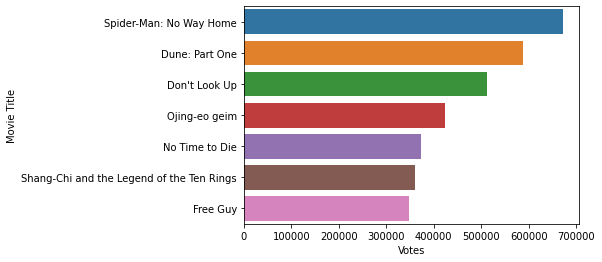

In [15]:
#PLOT 7 FILM TERATAS
sns.barplot(x="Votes", y=top7.index, data=top7)


Conclusion: 
- Film paling populer pada tahun 2021 dengan menggunakan hasil voting adalah Spider-man: No Way Home  dengan jumlah 671.726 vote (sumber: imdb, tanggal 9 Juli 2022, pukul 10.56 WIB)

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.